In [6]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score

## Defining the bucket 
s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

## Defining the csv file 
file_key = 'Fall_2021/In_Class_Assignments/circle_data.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
circles = pd.read_csv(file_content_stream)
circles.head()

,x,y
0,0.421362,0.161185
1,-0.385647,0.449012
2,0.425654,-0.100170
3,-0.574566,0.741009
4,-0.255552,0.572340


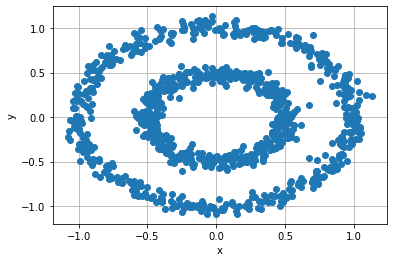

In [7]:
## Visualizing the data 
plt.plot(circles['x'], circles['y'], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [8]:
## Transforming the data to 0-1 scale
scaler = MinMaxScaler()

circles[['x_0_1', 'y_0_1']] = scaler.fit_transform(circles)
circles.head()

,x,y,x_0_1,y_0_1
0,0.421362,0.161185,0.677955,0.562456
1,-0.385647,0.449012,0.313458,0.692048
2,0.425654,-0.100170,0.679893,0.444782
3,-0.574566,0.741009,0.228130,0.823518
4,-0.255552,0.572340,0.372217,0.747576


In [9]:
## Fitting spectral clustering with 2 clusters 
spectral_clustering = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', n_neighbors = 20).fit(circles[['x_0_1', 'y_0_1']])

## Appending clusters labels to the dataset
circles['spectral_cluster'] = spectral_clustering.labels_
circles.head()

,x,y,x_0_1,y_0_1,spectral_cluster
0,0.421362,0.161185,0.677955,0.562456,0
1,-0.385647,0.449012,0.313458,0.692048,0
2,0.425654,-0.100170,0.679893,0.444782,0
3,-0.574566,0.741009,0.228130,0.823518,1
4,-0.255552,0.572340,0.372217,0.747576,0
